<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/2020-10/LR_with_propensity_compare_SIP_and_no_SIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. load data

In [133]:
cd drive/My\ Drive/fall

[Errno 2] No such file or directory: 'drive/My Drive/fall'
/content


In [134]:
ls

county_data_with_reduced_covariates_with_SIP.csv  sample_data/


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('county_data_with_reduced_covariates_with_SIP.csv')

In [3]:
data.dropna(inplace = True)

In [4]:
print(f"after dropping this dataset has {data.shape[0]} records.")

after dropping this dataset has 2995 records.


# 1. PSM

In [5]:
%load_ext rpy2.ipython
# For (automatic) translation of Pandas objects to R
from rpy2.robjects import pandas2ri
pandas2ri.activate()

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [6]:
%%R
# install standard propensity matching library in R 
install.packages("MatchIt")
# load MatchIt package
library(MatchIt)
# install optimal match package
install.packages('optmatch')
library(optmatch)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘RcppProgress’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppProgress_0.4.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 12077 bytes (11 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [7]:
# rename data to dataframe
dataframe = data

In [8]:
# -i means pass in some argument/data from python world to R world
%%R -i dataframe

# using MatchIt package to do PSM - guess it used logistic regression?

m.out <- matchit(SIP.~Median.Household.Income + X..Rural +
                 political_diff+
                 X..Asian + X..Black + 
                 X..Non.Hispanic.White +
                 X..Hispanic + Population_y,
                 method = "full", data = dataframe) 

R[write to console]: Warning:
R[write to console]:  Fewer control units than treated units; some control units will be matched to multiple treated units.



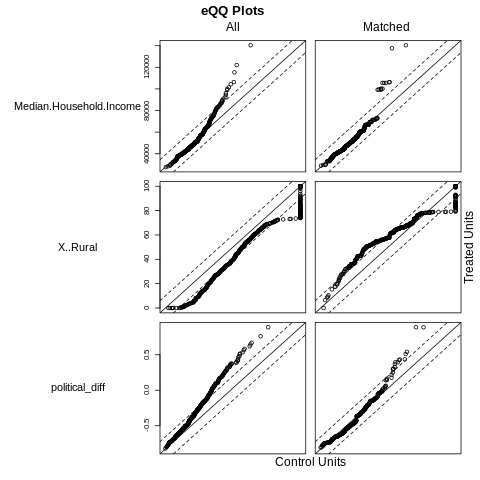

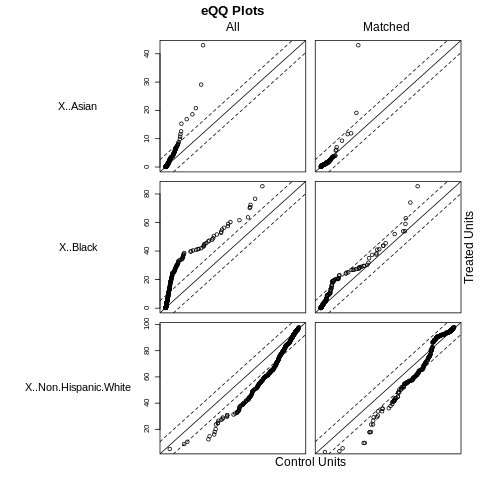

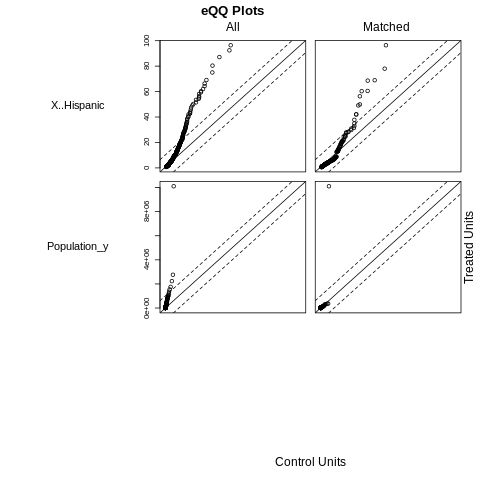

In [9]:
# to see how maching it doing by visualizing distributions
%%R
plot(m.out)

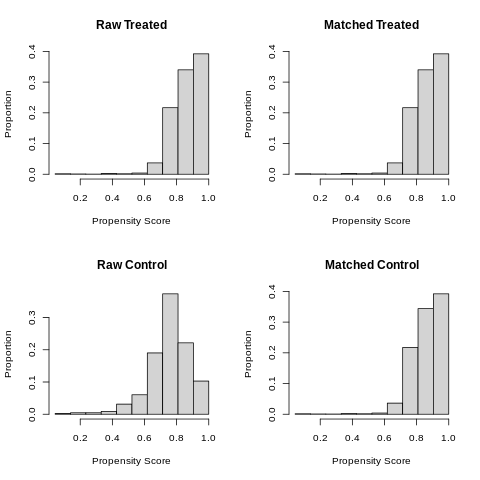

In [10]:
%%R
plot(m.out, type = 'hist')

[1] "To identify the units, use first mouse button; to stop, use second."
integer(0)


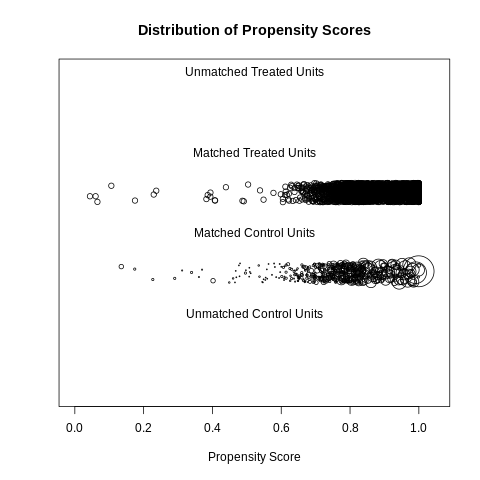

In [11]:
%%R
plot(m.out, type='jitter')

In [12]:
%%R
summary(m.out, standardize=T)


Call:
matchit(formula = SIP. ~ Median.Household.Income + X..Rural + 
    political_diff + X..Asian + X..Black + X..Non.Hispanic.White + 
    X..Hispanic + Population_y, data = dataframe, method = "full")

Summary of Balance for All Data:
                        Means Treated Means Control Std. Mean Diff. Var. Ratio
distance                       0.8676        0.7547          1.1147     0.6214
Median.Household.Income    52991.1876    52921.7584          0.0048     1.9453
X..Rural                      55.2676       64.5125         -0.2978     1.1472
political_diff                -0.2877       -0.4283          0.4492     2.0238
X..Asian                       1.6851        0.9888          0.2323     5.5560
X..Black                      10.2542        4.0293          0.4151     2.6660
X..Non.Hispanic.White         74.8670       82.4000         -0.3679     2.0034
X..Hispanic                   10.2487        6.5177          0.2534     5.5087
Population_y              123128.3980    30946.601

In [13]:
%%R
# extract matched data.
matched_data <- match.data(m.out)

In [14]:
# import dataframe from R to python.... since I am not familar with manipulating
# R objects 
matched_data = %R matched_data

In [15]:
no_SIP_diff = np.average(matched_data[matched_data['SIP.'] == 0]['diff_in_perc_at_home'], weights = matched_data[matched_data['SIP.'] == 0]['weights'])

In [16]:
SIP_diff = np.average(matched_data[matched_data['SIP.'] == 1]['diff_in_perc_at_home'], weights = matched_data[matched_data['SIP.'] == 1]['weights'])

In [17]:
SIP_diff

0.03318145620033819

In [18]:
no_SIP_diff

0.02198215399177096

In [19]:
SIP_diff - no_SIP_diff

0.011199302208567227

In [20]:
matched_data

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
0,1.0,AL,Alabama,Autauga County,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.000000,1
1,1.0,AL,Alabama,Baldwin County,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.000000,107
2,1.0,AL,Alabama,Barbour County,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.000000,389
3,1.0,AL,Alabama,Bibb County,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.000000,86
4,1.0,AL,Alabama,Blount County,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,56.0,WY,Wyoming,Sweetwater County,56037.0,-0.018485,0,73315.0,10.9,43051,-0.535382,26.2,12.1,1.0,1.1,16.1,79.3,0.669064,0.058477,359
2992,56.0,WY,Wyoming,Teton County,56039.0,0.075183,1,99087.0,46.4,23081,0.278663,18.4,15.4,1.4,0.6,14.9,81.5,0.797502,1.000000,382
2993,56.0,WY,Wyoming,Uinta County,56041.0,0.010157,0,63401.0,43.1,20299,-0.614926,28.8,14.1,0.5,0.7,9.2,87.4,0.662699,0.175432,224
2994,56.0,WY,Wyoming,Washakie County,56043.0,-0.007825,0,55190.0,36.0,7885,-0.640377,22.7,21.7,0.8,0.5,14.1,82.4,0.679251,0.701727,145


Seems like distance column is the propensity score we want because you can find out [here](https://cran.r-project.org/web/packages/MatchIt/MatchIt.pdf) that without specifying any distance metric the default distance is "logit", which I think is the propensity score we are using.

In [21]:
# max propensity score
matched_data['distance'].max()

0.9999999999999998

In [22]:
matched_data[matched_data['distance'] == matched_data['distance'].max()]

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
89,4.0,AZ,Arizona,Maricopa County,4013.0,0.070350,1,65234.0,2.4,4410824,-0.034465,23.9,15.2,4.6,5.5,31.3,54.9,1.0,1.0,88
189,6.0,CA,California,Los Angeles County,6037.0,0.118096,1,67986.0,0.6,10105518,0.480185,21.7,13.6,15.4,8.0,48.6,26.1,1.0,1.0,88
200,6.0,CA,California,Orange County,6059.0,0.159275,1,89373.0,0.1,3185968,0.076800,21.9,14.8,21.4,1.6,34.2,40.1,1.0,1.0,88
203,6.0,CA,California,Riverside County,6065.0,0.091735,1,66793.0,4.6,2450758,0.043345,25.1,14.4,7.1,6.2,49.6,34.7,1.0,1.0,88
207,6.0,CA,California,San Diego County,6073.0,0.128628,1,78777.0,3.3,3343364,0.178358,21.6,14.0,12.6,4.7,34.0,45.2,1.0,1.0,88
339,12.0,FL,Florida,Miami-Dade County,12086.0,0.156587,1,52043.0,0.4,2761581,0.295646,20.2,16.2,1.7,15.6,69.1,13.0,1.0,1.0,88
579,17.0,IL,Illinois,Cook County,17031.0,0.123588,1,63347.0,0.0,5180493,0.529565,21.8,14.6,7.9,23.0,25.5,42.1,1.0,1.0,153
1769,36.0,NY,New York,Kings County,36047.0,0.173891,1,60862.0,0.0,2582830,0.618298,22.8,13.9,12.7,29.9,19.1,36.4,1.0,1.0,88
2454,48.0,TX,Texas,Dallas County,48113.0,0.078694,1,59838.0,0.7,2637772,0.262413,26.1,10.7,6.7,22.6,40.5,28.6,1.0,1.0,88
2497,48.0,TX,Texas,Harris County,48201.0,0.090368,1,60241.0,1.2,4698619,0.123964,26.6,10.5,7.4,18.8,43.3,29.1,1.0,1.0,88


In [23]:
# minimum propensity score
matched_data['distance'].min()

0.0439668014865062

In [24]:
matched_data[matched_data['distance'] == matched_data['distance'].min()]

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
77,2.0,AK,Alaska,Northwest Arctic Borough,2188.0,0.063479,1,59337.0,57.5,7671,-0.151711,35.3,7.3,0.8,1.1,3.8,10.9,0.043967,1.0,189


# 2. standardize data for both data_SIP and data_no_SIP

In [25]:
# import packages from LR and standardize tool
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [26]:
# get only numeric columns because we can't scale the strings, etc.
matched_data = matched_data._get_numeric_data()

In [27]:
data_SIP = matched_data[matched_data['SIP.'] == 1]
data_no_SIP = matched_data[matched_data['SIP.'] == 0]

In [28]:
data_SIP

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights
0,1.0,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.0
1,1.0,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.0
2,1.0,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.0
3,1.0,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.0
4,1.0,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,55.0,55135.0,0.018980,1,58648.0,64.9,51128,-0.302460,20.3,20.9,0.6,0.5,3.3,94.1,0.834856,1.0
2971,55.0,55137.0,-0.019303,1,52340.0,89.5,24263,-0.323301,18.3,24.4,0.6,2.0,6.3,89.6,0.859367,1.0
2972,55.0,55139.0,0.071851,1,57785.0,13.4,171020,-0.074431,20.5,16.4,3.0,2.2,4.2,88.4,0.945545,1.0
2973,55.0,55141.0,0.007077,1,55879.0,36.7,73055,-0.192777,21.6,20.6,2.0,0.9,3.1,92.2,0.858234,1.0


In [29]:
data_no_SIP

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights
97,5.0,5001.0,0.002032,0,43887.0,34.7,17769,-0.305821,22.9,19.6,0.8,24.5,3.3,69.5,0.869214,0.701727
98,5.0,5003.0,0.004202,0,41127.0,51.7,20046,-0.365018,22.9,20.4,0.3,24.5,5.5,68.3,0.896433,2.280612
99,5.0,5005.0,-0.000820,0,39686.0,65.8,41619,-0.536072,17.7,30.9,0.5,0.4,2.5,94.5,0.826325,4.034929
100,5.0,5007.0,0.075433,0,68978.0,25.2,272608,-0.348571,26.3,13.4,4.1,1.8,16.9,73.0,0.978450,0.350863
101,5.0,5009.0,-0.000736,0,44482.0,62.2,37480,-0.584465,22.9,20.7,0.7,0.4,2.6,93.6,0.783349,0.175432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,56.0,56035.0,0.042121,0,74570.0,100.0,9813,-0.643472,22.5,19.5,0.7,0.8,7.5,89.0,0.698101,0.175432
2991,56.0,56037.0,-0.018485,0,73315.0,10.9,43051,-0.535382,26.2,12.1,1.0,1.1,16.1,79.3,0.669064,0.058477
2993,56.0,56041.0,0.010157,0,63401.0,43.1,20299,-0.614926,28.8,14.1,0.5,0.7,9.2,87.4,0.662699,0.175432
2994,56.0,56043.0,-0.007825,0,55190.0,36.0,7885,-0.640377,22.7,21.7,0.8,0.5,14.1,82.4,0.679251,0.701727


Notice that we have state and county_code, which are not our covariates. I include them here to see the random covariate's coefficients in linear model

In [30]:
# function that given a dataframe, standardize its columns except the response
# column and the propensity score column and SIP. column.
def getScaledDataFrame(originalDataFrame):
  #scaler = StandardScaler()
  # I here choose not to standardize all variables except
  # the response variable and propensity score
  #X = originalDataFrame.drop(['distance', 'diff_in_perc_at_home', 'SIP.'], axis = 1)
  #data_scaled = scaler.fit_transform(X)

  #df_scaled = pd.DataFrame(data = data_scaled, columns = X.columns)
  #df_others = originalDataFrame[['distance', 'diff_in_perc_at_home', 'SIP.']]
  #df_others = df_others.reset_index() # make indices have the same type
  #df_scaled['distance'] = df_others['distance']
  #df_scaled['diff_in_perc_at_home'] = df_others['diff_in_perc_at_home']
  #df_scaled['SIP.'] = df_others['SIP.']
  return originalDataFrame

In [31]:
df_SIP_scaled = getScaledDataFrame(data_SIP)
df_no_SIP_scaled = getScaledDataFrame(data_no_SIP)

In [32]:
df_SIP_scaled

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights
0,1.0,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.0
1,1.0,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.0
2,1.0,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.0
3,1.0,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.0
4,1.0,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,55.0,55135.0,0.018980,1,58648.0,64.9,51128,-0.302460,20.3,20.9,0.6,0.5,3.3,94.1,0.834856,1.0
2971,55.0,55137.0,-0.019303,1,52340.0,89.5,24263,-0.323301,18.3,24.4,0.6,2.0,6.3,89.6,0.859367,1.0
2972,55.0,55139.0,0.071851,1,57785.0,13.4,171020,-0.074431,20.5,16.4,3.0,2.2,4.2,88.4,0.945545,1.0
2973,55.0,55141.0,0.007077,1,55879.0,36.7,73055,-0.192777,21.6,20.6,2.0,0.9,3.1,92.2,0.858234,1.0


In [33]:
df_no_SIP_scaled

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights
97,5.0,5001.0,0.002032,0,43887.0,34.7,17769,-0.305821,22.9,19.6,0.8,24.5,3.3,69.5,0.869214,0.701727
98,5.0,5003.0,0.004202,0,41127.0,51.7,20046,-0.365018,22.9,20.4,0.3,24.5,5.5,68.3,0.896433,2.280612
99,5.0,5005.0,-0.000820,0,39686.0,65.8,41619,-0.536072,17.7,30.9,0.5,0.4,2.5,94.5,0.826325,4.034929
100,5.0,5007.0,0.075433,0,68978.0,25.2,272608,-0.348571,26.3,13.4,4.1,1.8,16.9,73.0,0.978450,0.350863
101,5.0,5009.0,-0.000736,0,44482.0,62.2,37480,-0.584465,22.9,20.7,0.7,0.4,2.6,93.6,0.783349,0.175432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,56.0,56035.0,0.042121,0,74570.0,100.0,9813,-0.643472,22.5,19.5,0.7,0.8,7.5,89.0,0.698101,0.175432
2991,56.0,56037.0,-0.018485,0,73315.0,10.9,43051,-0.535382,26.2,12.1,1.0,1.1,16.1,79.3,0.669064,0.058477
2993,56.0,56041.0,0.010157,0,63401.0,43.1,20299,-0.614926,28.8,14.1,0.5,0.7,9.2,87.4,0.662699,0.175432
2994,56.0,56043.0,-0.007825,0,55190.0,36.0,7885,-0.640377,22.7,21.7,0.8,0.5,14.1,82.4,0.679251,0.701727


# 3. create bins of propensity scores

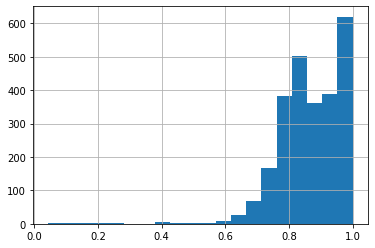

In [34]:
df_SIP_scaled['distance'].hist(bins = 20)

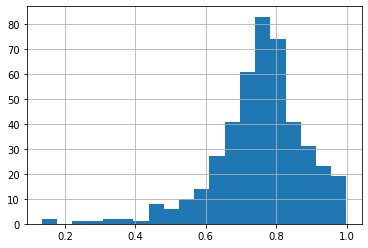

In [35]:
df_no_SIP_scaled['distance'].hist(bins = 20)

In [36]:
# we decided to cup propensity into 3 non-uniform groups to balance
# the number of data points in each group.
#bins = pd.IntervalIndex.from_tuples([(0, 0.75), (0.75, 0.85), (0.85, 1)])
#sip_bins = pd.IntervalIndex.from_tuples([(0, 0.75), (0.75, 0.85), (0.85, 0.9), (0.9, 0.95), (0.95, 1.0)])
# create propensity buckets for df_SIP_scaled
#propensity_buckets = pd.cut(df_SIP_scaled['distance'], sip_bins)
propensity_buckets = pd.qcut(df_SIP_scaled['distance'], 20)
df_SIP_scaled['propensity_bucket'] = propensity_buckets

# create propensity buckets for df_SIP_scaled
#propensity_buckets = pd.cut(df_no_SIP_scaled['distance'], bins)
propensity_buckets = pd.qcut(df_no_SIP_scaled['distance'], 10)
df_no_SIP_scaled['propensity_bucket'] = propensity_buckets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [37]:
df_SIP_scaled.head()

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,propensity_bucket
0,1.0,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.0,"(0.83, 0.841]"
1,1.0,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.0,"(0.951, 0.964]"
2,1.0,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.0,"(0.964, 0.98]"
3,1.0,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.0,"(0.853, 0.868]"
4,1.0,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.0,"(0.83, 0.841]"


In [38]:
df_no_SIP_scaled.head()

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,propensity_bucket
97,5.0,5001.0,0.002032,0,43887.0,34.7,17769,-0.305821,22.9,19.6,0.8,24.5,3.3,69.5,0.869214,0.701727,"(0.843, 0.907]"
98,5.0,5003.0,0.004202,0,41127.0,51.7,20046,-0.365018,22.9,20.4,0.3,24.5,5.5,68.3,0.896433,2.280612,"(0.843, 0.907]"
99,5.0,5005.0,-0.000820,0,39686.0,65.8,41619,-0.536072,17.7,30.9,0.5,0.4,2.5,94.5,0.826325,4.034929,"(0.814, 0.843]"
100,5.0,5007.0,0.075433,0,68978.0,25.2,272608,-0.348571,26.3,13.4,4.1,1.8,16.9,73.0,0.978450,0.350863,"(0.907, 1.0]"
101,5.0,5009.0,-0.000736,0,44482.0,62.2,37480,-0.584465,22.9,20.7,0.7,0.4,2.6,93.6,0.783349,0.175432,"(0.768, 0.792]"


# 4. linear regression in each bucket for both df_SIP and df_no_SIP

In [39]:
# given a dataframe, print out results of the linear regression
# on each propensity buckets. Assume such propensity bucket
# exists as a column of the dataframe
def linearRegressionOnBuckets(df_scaled):
  regressor = LinearRegression()
  # if this dataframe's column of SIP. includes 1, means it it dataframe with shelter in place.
  if 1 in df_scaled['SIP.'].unique():
    print('results for shelter in place counties:')
  else:
    print('results for counties without shelter in place')
  print()
  for bin in sorted(df_scaled['propensity_bucket'].unique()):
    data_in_this_bin = df_scaled[df_scaled['propensity_bucket'] == bin]
    X = data_in_this_bin.drop(['diff_in_perc_at_home', 'weights', \
                              'distance', 'propensity_bucket', 'county_code', 'state', 'SIP.'], axis = 1)
    y = data_in_this_bin['diff_in_perc_at_home']
    num_of_data_points = data_in_this_bin.shape[0]
    print(f'propensity score from {bin.left} to {bin.right} has {num_of_data_points} data points')
    #regressor.fit(X, y)
    # argsort so we can see the most important coefficient of linear regression first
    #for i in np.argsort(regressor.coef_)[::-1]:
    #  coef = regressor.coef_[i]
    #  print(f'after standardization, feature {X.columns[i]}\' coefficient is {coef} in this bucket')
    
    # print the average effect size for this bin.
    effect_size = np.average(data_in_this_bin['diff_in_perc_at_home'], weights = data_in_this_bin['distance'])
    print(data_in_this_bin.mean())
    print(f'average effect size is: {effect_size}')

    print()

In [40]:
linearRegressionOnBuckets(df_scaled=df_SIP_scaled)

results for shelter in place counties:

propensity score from 0.043 to 0.717 has 128 data points
state                              25.796875
county_code                     25900.312500
diff_in_perc_at_home                0.019408
SIP.                                1.000000
Median.Household.Income         58202.789062
X..Rural                           56.347656
Population_y                    18549.648438
political_diff                     -0.445732
X..less.than.18.years.of.age       23.798437
X..65.and.over                     18.718750
X..Asian                            1.304688
X..Black                            1.208594
X..Hispanic                         5.502344
X..Non.Hispanic.White              79.470312
distance                            0.625874
weights                             1.000000
dtype: float64
average effect size is: 0.02089318961943857

propensity score from 0.717 to 0.754 has 127 data points
state                              28.771654
county_code          

In [41]:
linearRegressionOnBuckets(df_scaled=df_no_SIP_scaled)

results for counties without shelter in place

propensity score from 0.134 to 0.609 has 45 data points
state                              41.866667
county_code                     41941.711111
diff_in_perc_at_home                0.015643
SIP.                                0.000000
Median.Household.Income         52280.422222
X..Rural                           65.311111
Population_y                    18189.155556
political_diff                     -0.454027
X..less.than.18.years.of.age       26.384444
X..65.and.over                     17.097778
X..Asian                            0.731111
X..Black                            1.266667
X..Hispanic                         4.753333
X..Non.Hispanic.White              66.917778
distance                            0.489225
weights                             0.091614
dtype: float64
average effect size is: 0.01512265703309694

propensity score from 0.609 to 0.674 has 45 data points
state                              40.155556
county_code     

We can see in `df_SIP_scaled`, populatoin has `0.2` linear regression coefficient within the first propensity bucket! which is bigger than `0.16` we've seen last time. In contrast, `df_no_SIP_scaled` only has coefficient of `0.02` for population in the first bucket. This is interesting. \\
number of data points in `df_no_SIP_scaled` are around 100 in each bucket, which is not too bad. \\
Also we can see that `median household income` is more important in `df_SIP_scaled`, as it has about `0.02` coefficient in all buckets, while `df_no_SIP_scaled` only has about `0.01` for `median household income`. \\
What does this all mean? Somehow population has a bigger impact in shelter in place counties with low propensity scores???